In [11]:
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import concavity
from concavity.utils import *
import matplotlib.pyplot as plt
%matplotlib inline

# Find concave and convex vertices on a polygon boundary

#### create a concave hull polygon

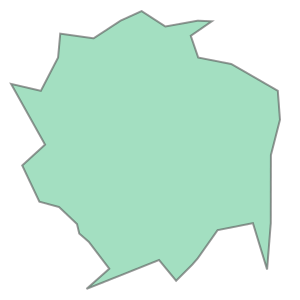

In [12]:
np.random.seed(seed=456)
x = np.random.normal(100000,500, 1000)
y = np.random.normal(100000, 500, 1000)
coords = np.array(list(zip(x, y)))
ch = concavity.concave_hull(coords, 20)
ch

The ```find_concave_vertices``` and ```find_concave_vertices``` functions take a polygon, an angle_threshold as the minimum angle above which a vertex is in a concave/convex location and a filter type that determines if the function outputs all point above the angle threshold or will attempt to locate the peak concave/convex vertices. the output type can be either ageopandas GeoDataFrame or a list of vertices and the angle of the two edges they connect

#### Here we choose to output all the concave/convex:

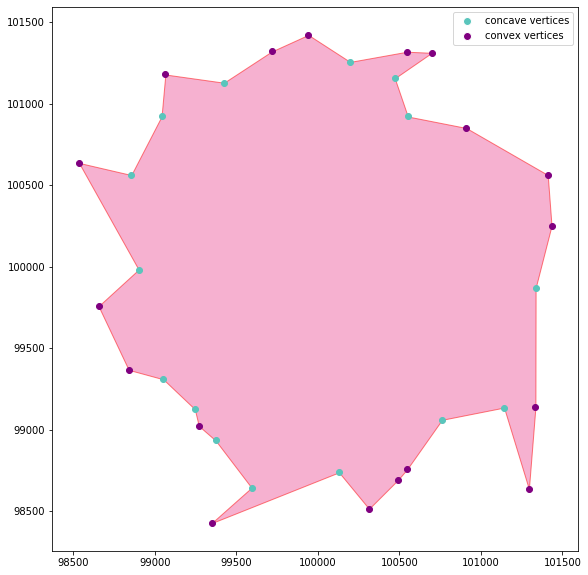

In [13]:
concave_df = concavity.find_concave_vertices(ch,0, filter_type ='all')
convex_df = concavity.find_convex_vertices(ch,0, filter_type ='all')
concavity.plot_vertices(ch, concave_df, convex_df)

#### To make a less obvious example - let's smooth our polygon and try again

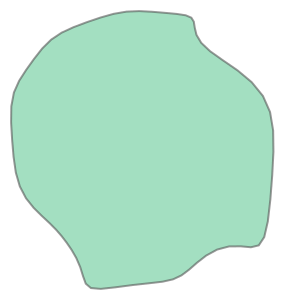

In [14]:
geom = gaussian_smooth_geom( ch)
geom

In [15]:
concave_df = concavity.find_concave_vertices(geom,0, filter_type ='all')
convex_df = concavity.find_convex_vertices(geom,0, filter_type ='all')

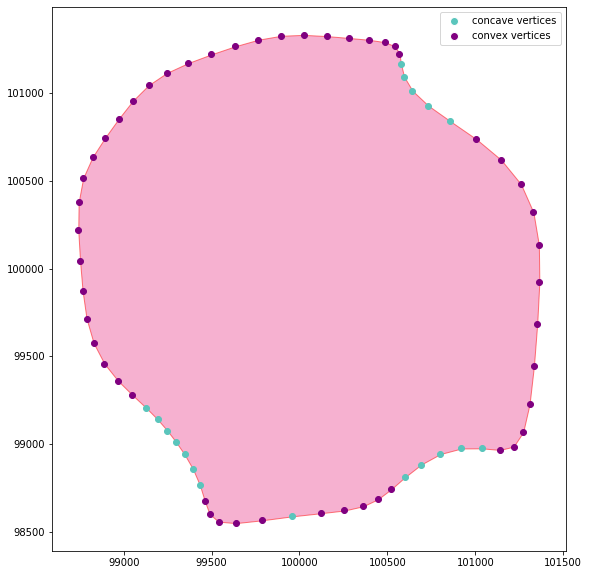

In [16]:
concavity.plot_vertices(geom, concave_df, convex_df)

#### Here we let the algorithm detect only the peak concave and convex vertices

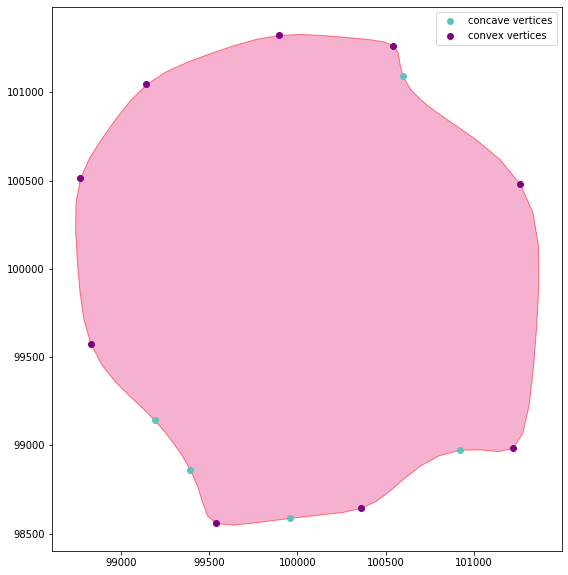

In [17]:
concave_df = concavity.find_concave_vertices(geom,0, filter_type ='peak')
convex_df = concavity.find_convex_vertices(geom,0, filter_type ='peak')
concavity.plot_vertices(geom, concave_df, convex_df)

#### We can smooth the angles by using the convovle boolean argument and refine even further the vertices that will be marked as peaks

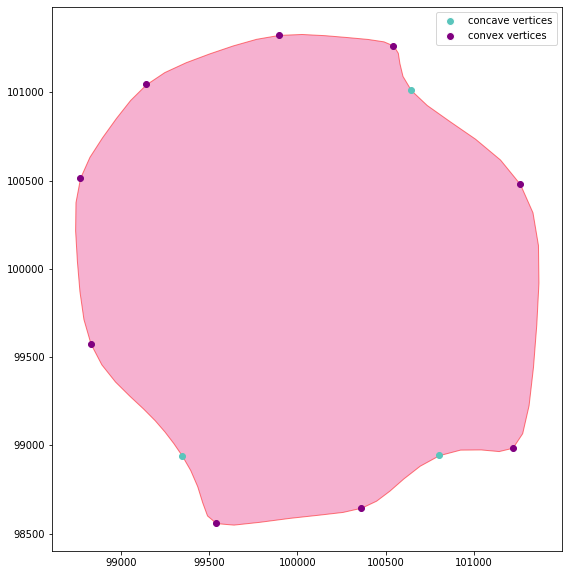

In [18]:
concave_df = concavity.find_concave_vertices(geom,0, filter_type ='peak', convolve = True)
convex_df = concavity.find_convex_vertices(geom,0, filter_type ='peak', convolve = True)
concavity.plot_vertices(geom, concave_df, convex_df)

#### Use the angle threshold argument to limit the angles above which a vertex is considered convex/concave:

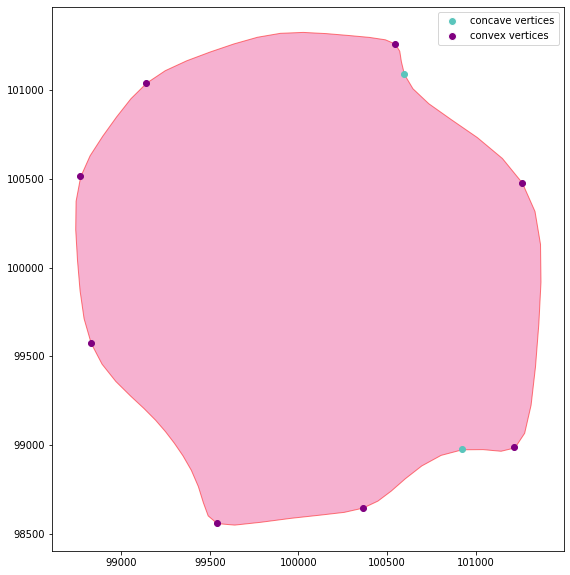

In [20]:
concave_df = concavity.find_concave_vertices(geom,angle_threshold=10, filter_type ='peak')
convex_df = concavity.find_convex_vertices(geom,angle_threshold=10, filter_type ='peak')
concavity.plot_vertices(geom, concave_df, convex_df)

/media/ml/ex1/my_repos/concavity/venv/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


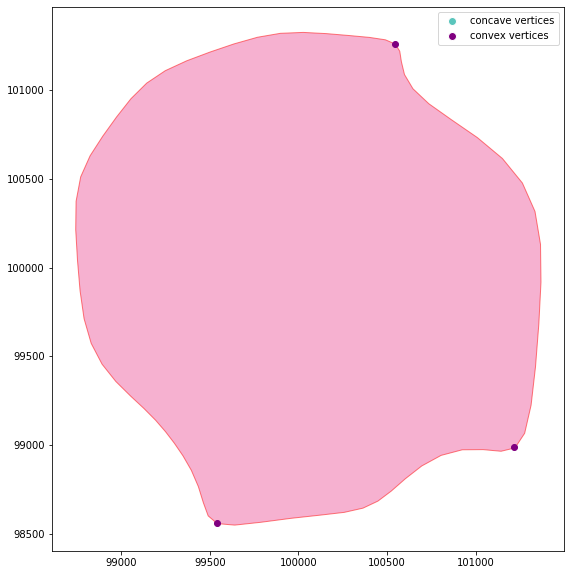

In [21]:
concave_df = concavity.find_concave_vertices(geom,35, filter_type ='all')
convex_df = concavity.find_convex_vertices(geom,35, filter_type ='all')
concavity.plot_vertices(geom, concave_df, convex_df)